project3


Group number 6 Baraa Nidal Ghannoum Tom Mantel Mubarik Omar ALi Abdi

Abstract: 

This raport uses MC methods to 3D geometric problems, focusing on 2 main topics ; volume estimation by randomly sampling points in  bounding box for single/multiple spheres and a DNA like collection of atomic spheres, and accessible volume estimation using cnstrained  3d random walkers  by simulation box to probe space outside a moelcular structure. include python code provides geometry classes (sphere, box) plus routines for visualizaion, sampling,volume computation and walker based simulations. 


Introduction:

Having the ability to predict the foreseeable future in industries related to finance, engineering, and buisness can become a crucial (element) to posess. A mathematical tecnhiqe which allows us to make assumptions on how certain outcomes might play out, only through past information is a vialible tool used in many differents fields. This is the foundation set by the Monte Carlo simulation [1]. In this project we will use Monte Carlo simulation to estimate the volume of a DNA structure in three dimensions. We will also estimate the uncertainty of atoms position in (x, y, z) coordinates [2]. 

Task 0

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D


Topic 1


task 0: Define simulation box (x,y,z)dimensions

In [5]:
def calculate_dna_bounds(filename="dna_coords.txt"): 
    x_min = y_min = z_min = None
    x_max = y_max = z_max = None
    with open(filename, "r") as f:
        for line in f:
            parts = line.split()
            if len(parts) < 4:
                continue

            x = float(parts[1])
            y = float(parts[2])
            z = float(parts[3])

            if x_min is None:
                x_min = x_max = x
                y_min = y_max = y
                z_min = z_max = z
            else:
                if x < x_min:
                    x_min = x
                if x > x_max:
                    x_max = x
                if y < y_min:
                    y_min = y
                if y > y_max:
                    y_max = y
                if z < z_min:
                    z_min = z 
                if z > z_max:
                    z_max = z

    if x_min is None:
        print("Ingen gyldige koordinater funnet.") 
        return None

    return (x_min, x_max), (y_min, y_max), (z_min, z_max)

bounds = calculate_dna_bounds("dna_coords.txt")
if bounds is None:
    print("Kan ikke beregne boks uten koordinater.")
else:
    (x_min, x_max), (y_min, y_max), (z_min, z_max) = bounds

    buffer = 1.0  

    box_x_min = x_min - buffer  
    box_x_max = x_max + buffer
    box_y_min = y_min - buffer
    box_y_max = y_max + buffer
    box_z_min = z_min - buffer
    box_z_max = z_max + buffer

    box_x_length = box_x_max - box_x_min
    box_y_length = box_y_max - box_y_min
    box_z_length = box_z_max - box_z_min

    print("box dimention:")
    print("X:", box_x_min, "to", box_x_max, "long:", box_x_length)
    print("Y:", box_y_min, "to", box_y_max, "long:", box_y_length)
    print("Z:", box_z_min, "to", box_z_max, "long:", box_z_length)

box dimention:
X: -49.18074 to -29.77274 long: 19.408
Y: -18.77082 to 3.54218 long: 22.313000000000002
Z: -10.99192 to 10.89708 long: 21.889000000000003


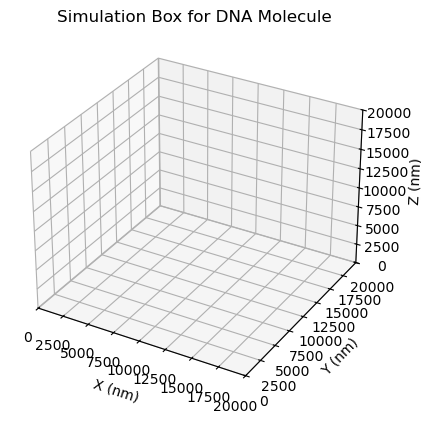

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([box_x_min, 20000])
ax.set_ylim([box_y_min, 20000])
ax.set_zlim([box_z_min, 20000])
ax.set_xlabel('X (nm)')
ax.set_ylabel('Y (nm)')
ax.set_zlabel('Z (nm)')
ax.set_title('Simulation Box for DNA Molecule') 
plt.show()

Task 1: random point placed inside the box we just created /generated 

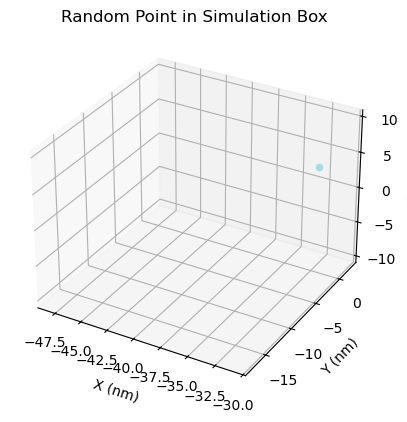

In [8]:
def random_point_in_box():
    x = np.random.uniform(box_x_min, box_x_max)
    y = np.random.uniform(box_y_min, box_y_max)
    z = np.random.uniform(box_z_min, box_z_max)
    return (x, y, z)
point = random_point_in_box()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(point[0], point[1], point[2], c='lightblue', marker='o')
ax.set_xlim([box_x_min, box_x_max])
ax.set_ylim([box_y_min, box_y_max])
ax.set_zlim([box_z_min, box_z_max])
ax.set_xlabel('X (nm)')
ax.set_ylabel('Y (nm)')
ax.set_zlabel('Z (nm)')
ax.set_title('Random Point in Simulation Box')

plt.show()


Task 2:
generated random sphere and place it randomly in the box in 3d 

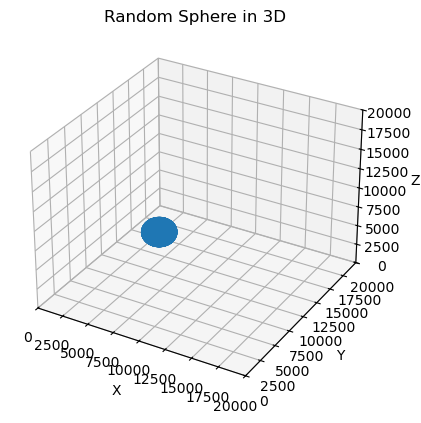

In [9]:

def random_num_with_r(amont, lower=0, upper=20000, radius_size=6):
    delta_radius = upper - lower
    r = np.round(np.random.uniform(0, delta_radius/ radius_size, size=amont))
    x, y, z = [], [], []
    for radius in r:
        x.append(np.round(np.random.uniform(lower + radius, upper - radius)))
        y.append(np.round(np.random.uniform(lower + radius, upper - radius)))
        z.append(np.round(np.random.uniform(lower + radius, upper - radius)))
    return np.array([r, x, y, z]).T
def plot_sphere(sphere, num_points=100):
    r, cx, cy, cz = sphere[0]
    u = np.linspace(0, 2 * np.pi, num_points)
    v = np.linspace(0, np.pi, num_points)
    x = r * np.outer(np.cos(u), np.sin(v)) + cx
    y = r * np.outer(np.sin(u), np.sin(v)) + cy
    z = r * np.outer(np.ones_like(u), np.cos(v)) + cz
    return x, y, z
sphere = random_num_with_r(1, 0, 20000, 6)
x, y, z = plot_sphere(sphere)
x = np.squeeze(x).ravel()
y = np.squeeze(y).ravel()
z = np.squeeze(z).ravel()
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.set_xlim(0, 20000)
ax.set_ylim(0, 20000)
ax.set_zlim(0, 20000)

ax.scatter(x, y, z, s=1, marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Random Sphere in 3D')

plt.show()


Task 3: point in sphere teats, it is more like checking whether a given point lies insidee that sphere (true/false) 

In [10]:

def point_in_sphere(point, sphere):
   
    return ((sphere[1] - point[0]) ** 2 +
            (sphere[2] - point[1]) ** 2 +
            (sphere[3] - point[2]) ** 2) < sphere[0] ** 2


def find_points_in_spheres(spheres, points):
   
    x_point, y_point, z_point = [], [], []
    point_in = 0

    for sphere in spheres:
        for point in points:
            if point_in_sphere(point, sphere):
                point_in += 1
                x_point.append(point[0])
                y_point.append(point[1])
                z_point.append(point[2])

    return x_point, y_point, z_point, point_in


# testing
sphere = np.array([[1000, 5000, 5000, 5000]])  
points = np.random.uniform(0, 20000, size=(1000, 3))  

x_point, y_point, z_point, point_in = find_points_in_spheres(sphere, points)

print(f"Points inside spheres: {point_in} out of {len(points)} ({point_in / len(points) * 100}%)")


Points inside spheres: 1 out of 1000 (0.1%)


Task 4: MC fraction and verification; generate many points randomly and compute and plote the fraction inside the sphere versus total points. copmare esttimated volume to analytical sphere volume 

 single sphere Monte Carlo
Points sampled: 200000
Fraction inside sphere: 0.00638
Estimated volume (MC): -58.52199406228374 (units^3, same units as input)
Analytic sphere volume: 59.80823675603488
Std error of V_est ≈ -1.633066766448055


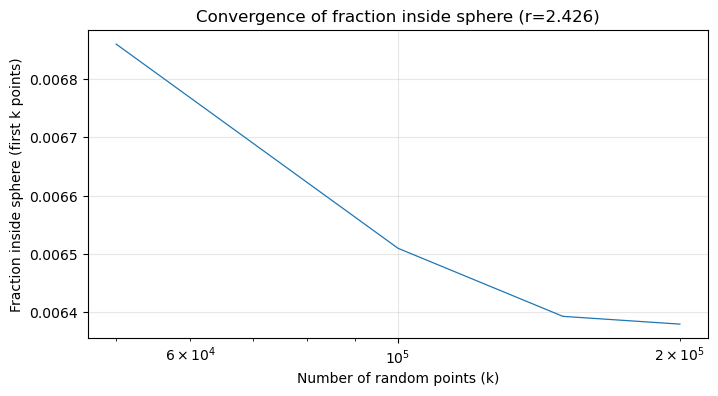

In [13]:


def run_and_show(sphere, N_total=200_000, batch=50_000, seed=42, plot=True):
  
    np.random.seed(seed)
    box = ((box_z_min, box_x_max), (box_y_min, box_y_max), (box_z_min, box_z_max))
    Vbox = (box[0][1]-box[0][0])*(box[1][1]-box[1][0])*(box[2][1]-box[2][0])

    n_done = 0
    n_inside = 0
    ks = []
    fracs = []

    r, cx, cy, cz = sphere
    while n_done < N_total:
        n_batch = min(batch, N_total - n_done)
        xs = np.random.uniform(box_x_min, box_x_max, size=n_batch)
        ys = np.random.uniform(box_y_min, box_y_max, size=n_batch)
        zs = np.random.uniform(box_z_min, box_z_max, size=n_batch)
        d2 = (xs - cx)**2 + (ys - cy)**2 + (zs - cz)**2
        inside_count = np.count_nonzero(d2 <= r*r)
        n_inside += inside_count
        n_done += n_batch
        ks.append(n_done)
        fracs.append(n_inside / n_done)

    frac = n_inside / N_total
    V_est = frac * Vbox
    SE = Vbox * np.sqrt(frac * (1 - frac) / N_total)
    V_analytic = 4.0/3.0 * np.pi * r**3

    print(" single sphere Monte Carlo")
    print(f"Points sampled: {N_total}")
    print(f"Fraction inside sphere: {frac}")
    print(f"Estimated volume (MC): {V_est} (units^3, same units as input)")
    print(f"Analytic sphere volume: {V_analytic}")
    print(f"Std error of V_est ≈ {SE}")

    if plot:
        plt.figure(figsize=(8,4))
        plt.plot(ks, fracs, lw=0.9)
        plt.xscale('log')
        plt.xlabel('Number of random points (k)')
        plt.ylabel('Fraction inside sphere (first k points)')
        plt.title(f'Convergence of fraction inside sphere (r={r})')
        plt.grid(alpha=0.3)
        plt.show()

    return {'frac': frac, 'V_est': V_est, 'SE': SE, 'V_analytic': V_analytic, 'ks': np.array(ks), 'fracs': np.array(fracs)}

# testing
sphere_tuple = (min(box_x_max-box_x_min, box_y_max-box_y_min, box_z_max-box_z_min)/8,
                (box_x_min+box_x_max)/2, (box_y_min+box_y_max)/2, (box_z_min+box_z_max)/2)

res4 = run_and_show(sphere_tuple, N_total=200_000, batch=50_000, seed=42, plot=True)

Task 5 estimate pi: 
use the MC sampling to estimate pis as a function of sample size and showing the estimate converges . 

In [12]:

def pi_vs_N(Ns, repeats=5, seed=123, plot=True):
    np.random.seed(seed)
    pi_means = []
    pi_stds = []
    all_estimates = []
    for i, N in enumerate(Ns):
        ests = []
        for r in range(repeats):
            pts = np.random.rand(N, 2)
            inside = (pts[:,0]**2 + pts[:,1]**2) <= 1.0
            ests.append(4.0 * inside.sum() / N)
        arr = np.array(ests)
        pi_means.append(arr.mean())
        pi_stds.append(arr.std(ddof=1) if len(arr)>1 else 0.0)
        all_estimates.append(arr)

    pi_means = np.array(pi_means)
    pi_stds = np.array(pi_stds)

    print(" Monte Carlo π estimates")
    print("N\tmean(pi)\tstd")
    for N, m, s in zip(Ns, pi_means, pi_stds):
        print(f"{N:,}\t{m:.8f}\t{s:.8f}")

# testing
Ns = [1_000, 5_000, 10_000, 50_000, 100_000]
res5 = pi_vs_N(Ns, repeats=5, seed=123, plot=True)

 Monte Carlo π estimates
N	mean(pi)	std
1,000	3.16240000	0.03244688
5,000	3.13712000	0.02357354
10,000	3.13296000	0.01523312
50,000	3.14457600	0.00882313
100,000	3.14088800	0.00534957


Task 6

In [ ]:
'''To make the code as crammed as possible, 
we researched into numpy to find possible solutions on how to generate 10 spheres with minimal coding. 
We landed on using the randomizer in uniform standard, 
where we define a minimum radius and a maximum radius, 
with generating n-amount of spheres, which in our case is 10. 
Previously done this task before in a similar way to generate - 
multiple lines in a very small line of code (codewars).'''

n_spheres = 10
r_min, r_max = 0.1, 0.3   # nm

radius_sph = np.random.uniform(r_min, r_max, size=n_spheres)


'''This code should calculate all sphere centers with numpy, without the need of loops.'''
centers = origin + radius_sph[:, None] + (L - 2*radius_sph[:, None]) * np.random.rand(n_spheres, 3)

print("centers:\n", centers)
print("radii:\n", radius_sph)

Task 7


In [ ]:
'''In task 7 we define the Monte Carlo function to calculate the fraction of points inside the spheres. 
I first made the formulas sort of by hand, 
and used previous experience from codewars and formula->to->code to implement the numpy code.
After that I researched numpy documentation to find the best functions to use to make the code as efficient as possible.
Which gave me the defined function below.'''

def mc_fraction_in_spheres(centers, radii, origin, L, n_points):
    pts = origin + np.random.rand(n_points, 3) * L  # Here we generate random points in the box         
    diff = pts[:, None, :] - centers[None, :, :]    # Here we calculate the difference vectors         
    dist2 = np.sum(diff**2, axis=2)                 # Here we calculate squared distances         
    inside_any = (dist2 <= radii**2).any(axis=1)    # Here we check if the points are inside any sphere         
    return inside_any.mean()

In [ ]:
'''Finally we plot the results from the Monte Carlo simulation.'''

Ns     = np.logspace(3, 6, 8, dtype=int)   # 1e3 ... 1e6 points
fracs  = [mc_fraction_in_spheres(centers, radius_sph, origin, L, N) for N in Ns]

plt.plot(Ns, fracs, marker='o')
plt.xscale('log')
plt.xlabel("Number of random points")
plt.ylabel("Fraction inside 10 spheres")
plt.show()

Task 8


In [ ]:
'''Continueing from our test from task 7, we're now using the DNA coordinates file as our data to analyze.
The analyzed atoms will be implemented through functions from numpy to make the code as efficient as possible.
'''

read_file = "dna_coords.txt"

# read: column 0 = symbol (str), columns 1–3 = x,y,z (float), in Å
data    = np.genfromtxt(read_file, dtype=None, encoding=None)
symbols = data[:, 0]
xyz_A   = data[:, 1:4].astype(float)

# Å -> nm
xyz_nm  = xyz_A / 10.0

In [ ]:
'''In this small code we the create a dictionary containing the covalent radiuses of the atoms.'''

r_pm = {   # picometers, sets the radiuses for the different atoms.
    "H": 120,
    "C": 170,
    "N": 155,
    "O": 152,
    "P": 180,
}

r_nm = np.array([r_pm[s] for s in symbols]) * 1e-4   # loops through every symbol in our symbols.

Task 9

In [ ]:
margin_nm = 0.2 # In nanometers (nm)

mins   = xyz_nm.min(axis=0) - margin_nm #Finding the minimum xyz values in nm
maxs   = xyz_nm.max(axis=0) + margin_nm #Finding the maximum xyz values in nm
origin = mins # Setting the origin to the minimum values minus margin
L      = maxs - mins # Finding the length of each side of the box
Vbox   = np.prod(L) # Finding the volume of the box

Task 10

In [ ]:
'''In task 10 we use the same function as in task 7 using the same monte carlo method, 
but we've now put in the work of the DNA coordinates, instead of using dummy test values. 
Instead of a given box dimension that is randomized, we use a box definition fitting inside the DNA coordinate file.
In the end we'll have a fraction of points inside the DNA structure, instead of points in randomized spheres as done in task 7. '''

def mc_fraction_in_dna(xyz_nm, r_nm, origin, L, n_points):
    pts  = origin + np.random.rand(n_points, 3) * L    
    diff = pts[:, None, :] - xyz_nm[None, :, :]   # instead of using centers, we use the xyz coordinates of the DNA atoms.      
    dist2 = np.sum(diff**2, axis=2)                   
    inside_any = (dist2 <= r_nm**2).any(axis=1)  # instead of radius_sph in task 7, we use given radius r_nm of the DNA atoms.         
    return inside_any.mean()

In [ ]:
Ns    = np.logspace(3, 6, 7, dtype=int)   # adjust upper limit if slow
fracs = [mc_fraction_in_dna(xyz_nm, r_nm, origin, L, N) for N in Ns]

plt.plot(Ns, fracs, marker='o')
plt.xscale('log')
plt.xlabel("Number of random points")
plt.ylabel("Fraction inside DNA spheres")
plt.show()

# final DNA volume estimate (using largest N)
V_DNA = fracs[-1] * Vbox
print("Estimated DNA volume (nm^3):", V_DNA)

Topic 2

To create a function where  a random set of walkers are randomly generated and iniate movement without order, the monte carlo method can be implimented to solve for the position before movement and after movement [3].

Task 1

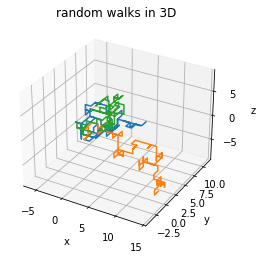

In [51]:
'To make a function of random walkers in 3D space from different positions, we can use the following libraries like numpy for numerical computation and matplotlib for plotting [3].'
'The following script was based upon the example from codingem.com for random walk in 3D [3].'

def randomwalk3D(n_walkers, n_steps):
    x, y, z = np.zeros(n_steps), np.zeros(n_steps), np.zeros(n_steps) # defining 3D arrays

    directions = ["up", "down", "left", "right", "in", "out"] # defining the direction which can be taken in 3d space
    for i in range(1, n_steps):
        step = random.choice(directions)  # randomizing steps taken 
        
        if step == "right":
            x[i] = x[i - 1] + 1
            y[i] = y[i - 1] 
            z[i] = z[i - 1] 
        elif step == "left":
            x[i] = x[i - 1] - 1
            y[i] = y[i - 1] 
            z[i] = z[i - 1]
        elif step == "up":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] + 1
            z[i] = z[i - 1]  
        elif step == "down":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] - 1 
            z[i] = z[i - 1] 
        elif step == "in":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] 
            z[i] = z[i - 1] - 1 
        elif step == "out":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] 
            z[i] = z[i - 1] + 1

    return x, y, z

n_walkers = 3  # amount of walkers
n_steps = 100  # amount of steps

fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')  # Creating a 3D space and a figure in 3D

for _ in range(n_walkers):   # Making a loop for the walkers
    x, y, z = randomwalk3D(1, n_steps) 
    ax.plot(x,y,z)
ax.set_title('random walks in 3D')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

The figure above illustrates how the application of the Monte Carlo method looks like with a random walker simulator. Which gives us different results each attempt.

Task 2

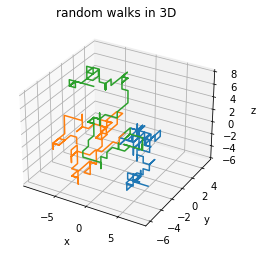

In [ ]:
'To make a fast function of random walkers in 3D space we can implement the same method as above but optimize it for speed.'


def fastrandomwalk3D(n_walkers, n_steps):
    x, y, z = np.zeros(n_steps), np.zeros(n_steps), np.zeros(n_steps) # defining 3D arrays

    directions = ["up", "down", "left", "right", "in", "out"] # defining the direction which can be taken in 3d space
    for i in range(1, n_steps):
        step = random.choice(directions)  # randomizing steps taken 
        
        if step == "right":
            x[i] = x[i - 1] + 1
            y[i] = y[i - 1] 
            z[i] = z[i - 1] 
        elif step == "left":
            x[i] = x[i - 1] - 1
            y[i] = y[i - 1] 
            z[i] = z[i - 1]
        elif step == "up":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] + 1
            z[i] = z[i - 1]  
        elif step == "down":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] - 1 
            z[i] = z[i - 1] 
        elif step == "in":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] 
            z[i] = z[i - 1] - 1 
        elif step == "out":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] 
            z[i] = z[i - 1] + 1

    return x, y, z

n_walkers = 3  # amount of walkers
n_steps = 100  # amount of steps

fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')  # Creating a 3D space and a figure in 3D

for _ in range(n_walkers):
    x, y, z = fastrandomwalk3D(1, n_steps)   # Making a loop for the walkers
    ax.plot(x,y,z)
ax.set_title('random walks in 3D fast')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()


Task 3

A great methodology which can be implemented for calculating the accessible volume of DNA is to model the DNA structure as a polymer structure using methods like random walker simulation from previous task 1 and 2 of topic 2 [4].


Task 4

The process of calculating the accessible volume of DNA can begin with defining the initial positons of the walkers by giving them randomized starting position. Then the making of discrete set of directions the walkers can make in a three dimensional space like. Up, down, left, right, in, and out. This is done by adding or subracting x, y, and z values by 1. Once that's settled we can generate the parameters such as the amount of elements in the DNA like, hydrogen, oxygen, nitrogen, carbon, and phospo, and define them as walkers. And the distance between each element as steps between each element. To verify this method is correct, a good amount of testing can be initiaded and compare each test result with each other to find any consistency. 

Task 5

In [ ]:
'The following test conducted will be the random walker simulation with the goal of calculating the accessible volume of DNA. this script builds upon the previous ones used on task 1, 2 of random walker function' 

## Phase 1: Defining directions and dimensions the walker can traverse

def DNArandomwalk3D(n_steps):
    x, y, z = np.zeros(n_steps), np.zeros(n_steps), np.zeros(n_steps)

    directions = ["up", "down", "left", "right", "in", "out"] # defining the direction which can be taken in 3d space
    for i in range(1, n_steps):
        step = random.choice(directions)  # randomizing steps taken 
        
        if step == "right":
            x[i] = x[i - 1] + 1
            y[i] = y[i - 1] 
            z[i] = z[i - 1] 
        elif step == "left":
            x[i] = x[i - 1] - 1
            y[i] = y[i - 1] 
            z[i] = z[i - 1]
        elif step == "up":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] + 1
            z[i] = z[i - 1]  
        elif step == "down":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] - 1 
            z[i] = z[i - 1] 
        elif step == "in":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] 
            z[i] = z[i - 1] - 1 
        elif step == "out":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] 
            z[i] = z[i - 1] + 1

    return x, y, z

## phase 2: calculate the accessible volume of DNA by creating a function

def accessible_volume(hydrogen, oxygen, carbon, grid_size=50): # Creating a 3d grid for the volume
    grid = np.zeros((grid_size, grid_size, grid_size)) 
    coordinates = np.vstack((hydrogen, oxygen, carbon)).T + grid_size / 2 # keep coordinates as positive values
    coordinates = np.clip(coordinates, 0, grid_size - 1)# keep the coordinates inside the grid
    
    # Converting the coordinates to integers

    coordinates_int = coordinates.astype(int)
    grid[coordinates_int[:,0], coordinates_int[:,1], coordinates_int[:,2]] = 1
    filled = np.sum(grid) # Occupied grids
    total = grid_size ** 3   # Total amount of points in the grid
    return total - filled 

n_simulations = 5
n_steps = 50

for i in range(n_simulations):
    hydrogen, oxygen, carbon = DNArandomwalk3D(n_steps)
    vol = accessible_volume(hydrogen, oxygen, carbon)  # Accessible volume
    
print("Accesible volume: ", int(vol))


Accesible volume:  124969


Conclusion: 

This work demonstrated how reliably MC integration and constrained random walk simulation as tools for 3D volume analysis. MC sampling reproduced the analytical result of the volume for a single sphere and produced a consistent numerical volume for the DNA-like assembly that accounts for atomic overlap. Constrained 3D random walkers provided dense, unbiased sampling of space around the molecule, allowing clear separation of probe-accessible regions from the volume occupied by the molecule. Validation with the single-sphere test confirmed the methods and implementation. The implemented classes and functions produce reproducible estimates for both occupied and accessible volumes.


Self reflection

Mubarik: Working on this project gave me an insight and a deeper understanding of the Monte Carlo method and it's applications in the study of chemistry like DNA structure coding. At first, it was challenging with setting up random walk functions in three dimensions, but as I progresed it became easier to model these functions. 

Tom: Programming task 6-10 was a really fun experience as I had encountered such tasks before in when i practised python using Codewars, this gave me the good idea to look back at previous tasks i did on the website. From which i did some more tasks resembling the parts that I did, and eventually managed to produce a very slim and short program without using too much codelines, yet resulting in the same output. I honestly believe codewars to be a better source to use than using AI, as it gives you the challenge to change your code repetitively in order to make it as slim as possible. I also used the simplicity of pen and paper to create the formulas through the help with a "from formula to code" website.

Baraa: I worked on tasks 0–5 and wrote the abstract and conclusion myself. I started with the paper first because I find it easier to write the actual code structure before translating it into Python to ensure everything works correctly or to just have it visualy ready infron of me before the actual coding start. Unfortunately, my work was deleted by mistake on the last day, so I had to rush to rewrite it. I didn’t have a backup of the previous code, but I remembered most of what I had done, so I used ChatGPT to help me recreate it as quickly as possible. Before this incident, I only used ChatGPT or other AI tools to get more examples of Monte Carlo coding, programming, and simulations, and I found many interesting examples on GitHub. 

Usage of AI:

Mubarik: I used chatGPT for searching for viable sources of methods of accessible volume calculations of DNA. Were I found the following source: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0013806 

References

[1] codewars, a website where you can try out different programming problems at different difficulties uploaded from people around the world, link: https://www.codewars.com/ (Accessed Nov 1st)

[2] Numpy, all you need to know about numpy programming, link: https://numpy.org/doc/stable/index.html (Accessed: Nov 2nd)

[3] fromformulatocode, making formulas to python code to save time: Link: http://fromformulatocode.com/generate (Accessed: Nov 2nd)

[4] amazon, "What is The Monte Carlo Simulation", aws.amazon.com, [Online], Available: https://aws.amazon.com/what-is/monte-carlo-simulation/ (accessed: Nov. 05. 2025)

[5] Medium, "Monte Carlo Simulation in Python", medium.com, [Online], Available: https://medium.com/@whystudying/monte-carlo-simulation-with-python-13e09731d500 (accessed: Nov. 05. 2025)

[6] codingem, "Random Walk in Python (1D, 2D, and 3D with Examples)", codingem.com, [Online], Available: https://www.codingem.com/random-walk-in-python/ (accessed: Nov. 06. 2025)

[7] M. Buenemann, and P. Lenz, "A Geometrical Model for DNA Organization in Bacteria", plos.org, Published: November 3, 2010, [Online], Available: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0013806 (accessed: Nov. 06. 2026) 